### Loading Dataset

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Your File Location')

In [3]:
data.head(5)

,loc,lat,lng,Arrest Count,restaurant,school,bus_station,atm,supermarket,park,gym,hospital,hike trail,bike trail
0,"36.62,-91.69",36.62,-91.69,41.0,0,0,0,0,0,0,0,0,0,0
1,"41.64,-87.54",41.64,-87.54,1.0,12,1,2,5,0,13,1,0,1,1
2,"41.64,-87.57",41.64,-87.57,0.0,12,4,0,8,0,11,2,1,2,1
3,"41.64,-87.59",41.64,-87.59,0.0,7,3,0,7,0,4,1,1,2,1
4,"41.64,-87.6",41.64,-87.60,2.0,9,17,0,10,1,3,3,0,1,2


### Examining Features

In [4]:
data.columns

Index(['loc', 'lat', 'lng', 'Arrest Count', 'restaurant', 'school',
       'bus_station', 'atm', 'supermarket', 'park', 'gym', 'hospital',
       'hike trail', 'bike trail'],
      dtype='object')

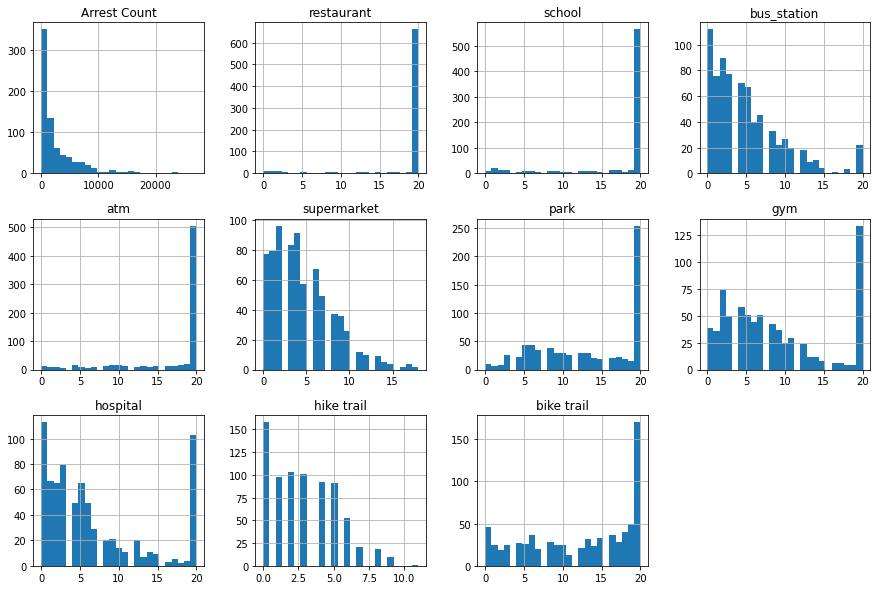

In [5]:
features_list = ['Arrest Count', 'restaurant', 'school','bus_station', 'atm', 'supermarket', 'park', 'gym', 'hospital','hike trail', 'bike trail']

axes = data[features_list].hist(bins=25, layout=(3,4), figsize=(15,10))

In [6]:
# Examining the above histograms gives an understanding of how the features are spread acroos the dataset.

### Applying weights to different features

In [7]:
def set_scores(row):
    score = ((row['Arrest Count']*-1.5) + # penalize by 1.5 times
             (row['restaurant']*1)+
             (row['school']*1.5)+
             (row['bus_station']*1)+
             (row['atm']*1)+
             (row['supermarket']*1)+
             (row['park']*1)+  # penalize by 1 times
             (row['gym']*1)+
             (row['hospital']*1.5)+
             (row['hike trail']*1)+
             (row['bike trail']*1))
    return score

In [8]:
data['scores'] = data.apply(set_scores, axis=1)

In [9]:
data.head(2)

,loc,lat,lng,Arrest Count,restaurant,school,bus_station,atm,supermarket,park,gym,hospital,hike trail,bike trail,scores
0,"36.62,-91.69",36.62,-91.69,41.0,0,0,0,0,0,0,0,0,0,0,-61.5
1,"41.64,-87.54",41.64,-87.54,1.0,12,1,2,5,0,13,1,0,1,1,35.0


### Scaling Scores

In [10]:
data['scaled_scores'] = data['scores']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
data['scaled_scores'] = scaler.fit_transform(data[["scaled_scores"]])

In [11]:
data.head(2)

,loc,lat,lng,Arrest Count,restaurant,school,bus_station,atm,supermarket,park,gym,hospital,hike trail,bike trail,scores,scaled_scores
0,"36.62,-91.69",36.62,-91.69,41.0,0,0,0,0,0,0,0,0,0,0,-61.5,9.937645
1,"41.64,-87.54",41.64,-87.54,1.0,12,1,2,5,0,13,1,0,1,1,35.0,9.961381


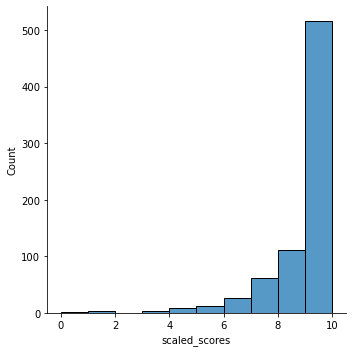

In [12]:
sns.displot(data['scaled_scores'], bins=10)